# Week5 Multiple Linear Regression
## 背景描述

汽车发动机在测功机上产生的**制动马力**被认为是**发动机转速**(每分钟转数，rpm)、**燃料的道路辛烷值**和**发动机压缩值**的函数，我们在实验室里进行实验，研究它们的函数关系。



## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）rpm | 发动机转速 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Road_Octane_Number | 道路辛烷值 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Compression | 压缩值 | continuous variable | $\mathbb{R}^+$ |
| （因变量）Brake_Horsepower | 制动马力 | continuous variable | $\mathbb{R}^+$ |



## 问题 
注：这里使用 \alpha=0.05 的显著性水平

1. 请用统计模型描述制动马力和上述 3 个自变量之间的函数关系.
2. 请问Q1中所建立的模型是否合理.
3. 当发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，估计制动马力值的合理区间范围.

In [1]:
## Q1 请用统计模型描述制动马力和上述 3 个自变量之间的函数关系.

In [2]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
p = 3 #注意这里p是参数个数
n = 12
# 把1这一项插入原始数据里面
x = pd.read_csv('Project5.csv')
x.insert(0, 'intercept', np.ones(len(x))) 
data = x.values * 1
df = pd.DataFrame(data, columns = ['intercept','rpm','Road_Number','Compression','Brake_Horsepower'])
print(df.head(10))

   intercept     rpm  Road_Number  Compression  Brake_Horsepower
0        1.0  2000.0         90.0        100.0             225.0
1        1.0  1800.0         94.0         95.0             212.0
2        1.0  2400.0         88.0        110.0             229.0
3        1.0  1900.0         91.0         96.0             222.0
4        1.0  1600.0         86.0        100.0             219.0
5        1.0  2500.0         96.0        110.0             278.0
6        1.0  3000.0         94.0         98.0             246.0
7        1.0  3200.0         90.0        100.0             237.0
8        1.0  2800.0         88.0        105.0             233.0
9        1.0  3400.0         86.0         97.0             224.0


In [3]:
# 使用包进行多元线性回归
model = ols('Brake_Horsepower ~ rpm+Road_Number+Compression', df).fit()
beta = model.params
print('参数估计值beta: \n', round(beta, 4))
X = data[:, 0 : p + 1]
Y = data[:, -1]
Y_hat = model.fittedvalues
model.summary()

参数估计值beta: 
 Intercept     -266.0312
rpm              0.0107
Road_Number      3.1348
Compression      1.8674
dtype: float64
/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Brake_Horsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Tue, 30 Mar 2021   Prob (F-statistic):            0.00317
Time:                        19:10:04   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -266.0312     92.674     -2.871      0.021    -479.737     -52.325
rpm             0.0107      0.004      2.390      0.044       0.000       0.021
Road_Number     3.1348      0.844      3.712      0.006       1.188       5.082
Compression     1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# 输出一元线性回归方程
print('Y_hat = %.2f + (%.2f * X1) + (%.2f * X2)+(%.2f * X3)' % (beta[0], beta[1], beta[2],beta[3]))

Y_hat = -266.03 + (0.01 * X1) + (3.13 * X2)+(1.87 * X3)


In [5]:
## 中心化后的，经验回归方程
# Step1. 求均值，即对X和Y都减去其均值
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
Y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 数据中心化
X_cent = X - X_mean
Y_cent = Y - Y_mean

# Do the multiple linear regression
df = pd.DataFrame(X_cent, columns = ['intercept_center','rpm_center','Road_Number_center','Compression_center'])
df['Brake_Horsepower_center'] = Y_cent
model_cent = ols('Brake_Horsepower_center ~ rpm_center+Road_Number_center+Compression_center', df).fit()
beta_cent = model_cent.params
print('参数估计值: \n', round(beta_cent, 4))
Y_hat_cent = model_cent.fittedvalues
model_cent.summary()

参数估计值: 
 Intercept            -0.0000
rpm_center            0.0107
Road_Number_center    3.1348
Compression_center    1.8674
dtype: float64
/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Brake_Horsepower_center   R-squared:                       0.807
Model:                                 OLS   Adj. R-squared:                  0.734
Method:                      Least Squares   F-statistic:                     11.12
Date:                     Tue, 30 Mar 2021   Prob (F-statistic):            0.00317
Time:                             19:10:04   Log-Likelihood:                -40.708
No. Observations:                       12   AIC:                             89.42
Df Residuals:                            8   BIC:                             91.36
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -2.22e-16      2.544  -8.73e-17      1.000      -5.866       5.866
rpm_center             0.0107      0.004      2.390      0.044       0.000       0.021
Road_Number_center     3.1348      0.844      3.712      0.006       1.188       5.082
Compression_center     1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 输出中心化后的一元线性回归方程
print('Y_hat_center = %.2f + (%.2f * X1_center) + (%.2f * X2_center)+(%.2f * X3_center)' % (beta_cent[0], beta_cent[1], beta_cent[2],beta_cent[3]))

Y_hat_center = -0.00 + (0.01 * X1_center) + (3.13 * X2_center)+(1.87 * X3_center)


通过比较可以看出，去中心化后的一元线性回归方程X的系数和未去中心化后的一元线性回归方程X的系数相同都为0.01，3.13和1.87，仅仅是截距不同而已。


## Q2. 请问Q1中所建立的模型是否合理.
根据公式：
$SSE=\sum {(y-\hat{y})^2}$;
$SST=\sum {(y-\bar{y})^2}$;
$SSR=\sum {(\hat{y}-\bar{y})^2}$

$\hat{\sigma^2}=\frac{1}{n-p-1}SSE$

$\hat{\beta}=(X^TX)^{-1}X^T$

H0 :β1 =β2 =···=βp =0 v.s H1 : 存在 βj 不为零，j = 1,2,··· ,p.

In [7]:
# 求解相关项
SSE = sum((Y - Y_hat) ** 2)
SST = sum((Y - Y_mean) ** 2)
SSR = sum((Y_hat - Y_mean) ** 2)

sigma2 = SSE / (n - p - 1)  # 方差
sigma = np.sqrt(sigma2)  # 标准差

c = np.dot(X.T, X) #C=(x'x)^{-1}
C = np.linalg.inv(c)  # 求逆
# print(C)

### F检验
$F_0=\frac{SSR/p}{SSE/(n-p-1)}$

In [8]:
print("n-p-1 = ",n-p-1)

n-p-1 =  8


In [9]:
# 计算F0
F0 = (SSR / p) / (SSE / (n - p - 1))
# F0 = model.fvalue
print('F0: %.2f' % F0)
F = round(f.ppf(0.95, dfn = p, dfd = n - p - 1), 2)

# 法1：
pVal1 = f.sf(F0, p, n - p - 1)
# pVal1 = model.f_pvalue
print('pVal1: %.2f' % pVal1)
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 

# 法2：
if F0 > F:
    print('Since F0 > F(0.95, 3, 8) = %.2f, reject H0.' % F)
else:
    print('Accept H0.') 

F0: 11.12
pVal1: 0.00

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 3, 8) = 4.07, reject H0.


由 F 检验结果可知，不论是从p值的角度还是从$F_0$的角度，都拒绝原假设，即该回归方程是显著的。
**一元线性模型的显著性检验——t 检验:**  
检验假设：$H_{0j}: \beta_j=0$ vs $H_{1j}: \beta_j \neq 0,j=1,2$

检验统计量:
$t=\frac{\beta}{\sqrt{c_{jj}}\sigma}$

In [10]:
# t检验
t0 = []
for i in range(p + 1):   
    t0.append(beta[i] / (np.sqrt(C[i][i] * sigma2)))  # 求t值
# t0 = model.tvalues
print('t0值为：', np.round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - p - 1)
print('t的临界值为：%.4f' % tVal)
pVal2 = []
for i in range(p + 1):
    P = t.sf(abs(t0[i]), n - p - 1)
    pVal2.append(P)  # 已知临界值求p值
# pVal2 = model.pvalues / 2
print('P值为：', np.round(pVal2, 4))

print('\n')
# 法1：
for i in range(p):
    if pVal2[i + 1] < alpha:
        print ('Since p%d-value < 0.05, reject H0%d.' % (i + 1, i + 1))
    else:
        print('Accept H0%d.' % (i + 1))
print('\n')   

# 法2：
for i in range(p):
    if abs(t0[i + 1]) > tVal:
        print('Since t0%d > t(0.975, 8) = %.4f, reject H0%d' % (i + 1, tVal, i + 1))
    else:
        print('Accept H0%d.' % (i + 1)) 

t0值为： [-2.8706  2.3896  3.7123  3.4936]
t的临界值为：2.3060
P值为： [0.0104 0.0219 0.003  0.0041]


Since p1-value < 0.05, reject H01.
Since p2-value < 0.05, reject H02.
Since p3-value < 0.05, reject H03.


Since t01 > t(0.975, 8) = 2.3060, reject H01
Since t02 > t(0.975, 8) = 2.3060, reject H02
Since t03 > t(0.975, 8) = 2.3060, reject H03


t检验与F检验出发的角度不同，t检验的角度是检验各项回归系数，从上面积算结果可知，各项回归系数都是显著的。而F检验中，则是从检验线性回归模型设定的角度检验回归的合理性。
### R方 可决系数
拟合优度可以用来度量回归方程对样本观测值的拟合程度。
在多元线性回归中，定义样本决定系数为
$R^2=\frac{SSR}{SST}=1-\frac{SSE}{SST}$
$R^2$越接近1，则说明回归拟合的效果越好，越接近于0，则说明回归拟合的效果越差。

In [11]:
R2 = SSR / SST
print('可决系数：%.4f' % R2)
# 调整可决系数 ，解释变量的数量与拟合的好坏
R2c = 1 - (SSE/(n-p-1)) / (SST/(n-1))
print('调整可决系数：%.4f' % R2c)

可决系数：0.8065
调整可决系数：0.7340


由上面计算的R方可知，他们都比较接近于1，说明回归的拟合效果比较好。

通过F检验检验了线性回归模型的合理性，通过T检验说明了回归系数的显著性，通过R方说明回归的拟合效果比较好，所以问题1中所建立的多元线性回归的模型是合理的

In [13]:
## 残差分析
data_res = data * 1.0  # 乘1.0 不然会损失精度
for i in range(n):
    data_res[:, p + 1] = Y - Y_hat
df = pd.DataFrame(data_res, columns = ['intercept','rpm','Road_Number','Compression','Brake_Horsepower_res'])
# res = data_res[:, p + 1]
res = model.resid
print(df.head())

   intercept     rpm  Road_Number  Compression  Brake_Horsepower_res
0        1.0  2000.0         90.0        100.0              0.731289
1        1.0  1800.0         94.0         95.0            -13.328247
2        1.0  2400.0         88.0        110.0            -11.958476
3        1.0  1900.0         91.0         96.0              3.137442
4        1.0  1600.0         86.0        100.0             11.555798


**残差分析1: 残差的正态概率图**   
使用残差正态概率图可验证残差呈正态分布的假设。残差的正态概率图应该大致为一条直线。

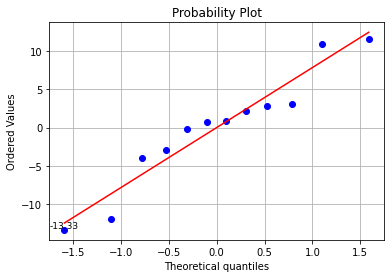

In [14]:
# 残差的正态概率图
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [15]:
# 异常值检验
MSE = SSE / (n - p - 1)
# MSE = model.mse_resid
d = np.abs(y) / np.sqrt(MSE)
if d < 3:
    print('残差', round(y, 2), '不是异常值.')
else:
    print('残差', round(y, 2), '是异常值')

残差 -13.33 不是异常值.


由残差的正态概率图和异常值检验可以看出，残差近似服从于概率分布

**残差分析2: 残差与拟合值的关系图**   
使用残差与拟合值图可验证“残差随机分布”和“具有常量方差”的假设。理想情况下，点应当在 0 的两端随机分布（模型的拟合点应该平均散布在被拟合值点附近），点中无可辨识的模式。  
下表中的模式可能表示该模型不满足模型假设: 

| 模式 | 模式的含义 |
| :----------: | :--------: |
| 残差相对拟合值呈扇形或不均匀分散 | 异方差 |
| 曲线 | 缺少高阶项 |
| 远离 0 的点 | 异常值 |
| 在 X 方向远离其他点的点 | 有影响的点|

Text(0, 0.5, 'e_i')

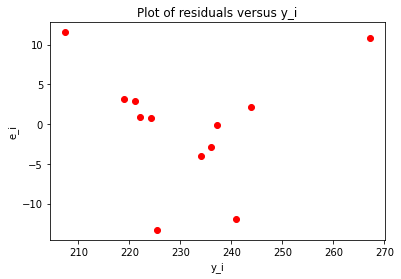

In [16]:
# 注意下面这个是残差与拟合值的关系图 ，不应该是残差与观测值之间的关系
plt.scatter(Y_hat, res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

从上面这个图可以看出，残差与拟合值的关系图中的分布是散乱且没有规则的，我们无法找到推翻原方差齐性假设的理由，所以数据是满足方差骑行的。

## Q3:当发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，估计制动马力值的合理区间范围.
$E[y_0]$的估计

In [21]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta0 = tVal * sigma * np.sqrt(x0.T @ C @ x0)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = [1,3000,90,100]
print('给定 x = ', x0, ', E(y_0) 的置信区间：', np.round(confidence_interval(x0), 4))
print('宽度 = ',np.round(confidence_interval(x0), 4)[1]-np.round(confidence_interval(x0), 4)[0])

给定 x =  [1, 3000, 90, 100] , E(y_0) 的置信区间： [226.2457 243.7181]
宽度 =  17.472399999999993


In [22]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta1 = tVal * sigma * np.sqrt(1 + x0.T @ C @ x0)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x0_ = [1,3000,90,100]
#预测区间要比置信区间宽一些。
print('给定 x = ', x0_, ', y_0 的预测区间：', np.round(confidence_interval(x0_), 4))
print('宽度 = ',np.round(confidence_interval(x0), 4)[1]-np.round(confidence_interval(x0), 4)[0])

给定 x =  [1, 3000, 90, 100] , y_0 的预测区间： [212.8622 257.1016]
宽度 =  44.23940000000002


从上面的差值可以看出，宽度44.23>17.47，符合预测区间大于置信区间的逻辑